In [ ]:
from qiskit import *
from qiskit_ibm_runtime import QiskitRuntimeService

In [5]:
with open('ibmapi.txt', 'r') as file:
    token = file.read().strip()

QiskitRuntimeService.save_account(
    token = token,
    instance = "Practice",
    set_as_default = True,
    overwrite = True
)
service = QiskitRuntimeService()

In [6]:
for backend in service.backends():
    name = backend.name
    qubits = backend.num_qubits
    status = backend.status().operational
    pending_jobs = backend.status().pending_jobs
    print(f"{name:20} | Qubits: {qubits} | Operational: {status} | Pending Jobs: {pending_jobs}")

ibm_brisbane         | Qubits: 127 | Operational: True | Pending Jobs: 2086
ibm_torino           | Qubits: 133 | Operational: True | Pending Jobs: 5296


In [7]:
q_reg = QuantumRegister(3, 'q')
c_reg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(q_reg, c_reg)
circuit.x(0)
circuit.x(1)
circuit.ccx(0, 1, 2)
circuit.measure(q_reg, c_reg)


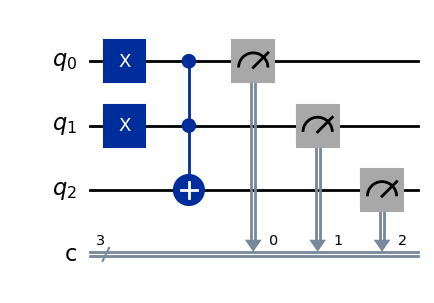

In [8]:
circuit.draw('mpl')